In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import re

In [2]:
from sklearn.datasets import fetch_20newsgroups

In [3]:
category=['rec.motorcycles']
train1 = fetch_20newsgroups(subset='train',categories=category)

In [4]:
list(train1.target_names)

['rec.motorcycles']

In [5]:
train1.data

['From: sturges@oasys.dt.navy.mil (Richard Sturges)\nSubject: Re: Rejetting carbs..\nReply-To: sturges@oasys.dt.navy.mil (Richard Sturges)\nOrganization: Carderock Division, NSWC, Bethesda, MD\nLines: 34\n\nNow, I am jumping into the middle of this thread so I may not know\nwhat y\'all been talking about, but I have a few comments:\n\nIn rec.motorcycles, davet@interceptor.cds.tek.com (Dave Tharp CDS) writes:\n>1.  Unless an engine is supercharged, the pressure available to force\n>air into the intake tract is _atmospheric_.  At the time the intake\n>valve is opened, the pressure differential available to move air is only\n>the difference between the combustion chamber pressure (left over after\n>the exhaust stroke) and atmospheric.  As the piston decends on the\n>intake stroke, combustion chamber pressure is decreased, allowing\n>atmospheric pressure to move more air into the intake tract.  At no time\n>does the pressure ever become "negative", or even approach a good\n>vacuum.\n\nTher

In [6]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Mohit\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Mohit\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [7]:
df=pd.DataFrame(train1.data,columns=['text'])

In [8]:
df1=pd.DataFrame(np.zeros(598),columns=['label'])

In [9]:
df=pd.concat([df,df1],axis=1)

In [10]:
df=df.head(200)

In [11]:
df

,text,label
0,From: sturges@oasys.dt.navy.mil (Richard Sturg...,0.0
1,From: mbeaving@bnr.ca (Michael Beavington)\nSu...,0.0
2,From: azw@aber.ac.uk (Andy Woodward)\nSubject:...,0.0
3,From: essbaum@rchland.vnet.ibm.com (Alexander ...,0.0
4,From: bclarke@galaxy.gov.bc.ca\nSubject: Fortu...,0.0
5,From: klf@druwa.ATT.COM (FranklinKL)\nSubject:...,0.0
6,From: parr@acs.ucalgary.ca (Charles Parr)\nSub...,0.0
7,From: ba7116326@ntuvax.ntu.ac.sg\nSubject: V-m...,0.0
8,From: brown@venus.iucf.indiana.edu (Robert J. ...,0.0
9,From: kens@lsid.hp.com (Ken Snyder)\nSubject: ...,0.0


In [12]:
category=['rec.sport.baseball']
train2 = fetch_20newsgroups(subset='train',categories=category)

In [13]:
df1=pd.DataFrame(train2.data,columns=['text'])
df1.shape

(597, 1)

In [14]:
df2=pd.DataFrame(np.ones(597),columns=['label'])

In [15]:
df2

,label
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0
5,1.0
6,1.0
7,1.0
8,1.0
9,1.0


In [16]:
df1=pd.concat([df1,df2],axis=1)

In [17]:
df1

,text,label
0,From: genetic+@pitt.edu (David M. Tate)\nSubje...,1.0
1,Organization: University of Notre Dame - Offic...,1.0
2,From: mlogan@thurman.prime.com (Max Logan x231...,1.0
3,From: steph@pegasus.cs.uiuc.edu (Dale Stephens...,1.0
4,From: Eastgate@world.std.com (Mark Bernstein)\...,1.0
5,From: shapiro-david@yale.edu (David Shapiro)\n...,1.0
6,From: rsmith@strobe.ATC.Olivetti.Com (Russ Smi...,1.0
7,From: atchison@cis.ohio-state.edu (mark edward...,1.0
8,From: marc@yogi.austin.ibm.com (Marc J. Stephe...,1.0
9,From: savoy@hg.uleth.ca (Jim Savoy)\nSubject: ...,1.0


In [18]:
df1=df1.head(200)

In [19]:
df1

,text,label
0,From: genetic+@pitt.edu (David M. Tate)\nSubje...,1.0
1,Organization: University of Notre Dame - Offic...,1.0
2,From: mlogan@thurman.prime.com (Max Logan x231...,1.0
3,From: steph@pegasus.cs.uiuc.edu (Dale Stephens...,1.0
4,From: Eastgate@world.std.com (Mark Bernstein)\...,1.0
5,From: shapiro-david@yale.edu (David Shapiro)\n...,1.0
6,From: rsmith@strobe.ATC.Olivetti.Com (Russ Smi...,1.0
7,From: atchison@cis.ohio-state.edu (mark edward...,1.0
8,From: marc@yogi.austin.ibm.com (Marc J. Stephe...,1.0
9,From: savoy@hg.uleth.ca (Jim Savoy)\nSubject: ...,1.0


In [20]:
df=pd.concat([df,df1])


In [21]:
df=df.reset_index(drop=True)

In [22]:
df

,text,label
0,From: sturges@oasys.dt.navy.mil (Richard Sturg...,0.0
1,From: mbeaving@bnr.ca (Michael Beavington)\nSu...,0.0
2,From: azw@aber.ac.uk (Andy Woodward)\nSubject:...,0.0
3,From: essbaum@rchland.vnet.ibm.com (Alexander ...,0.0
4,From: bclarke@galaxy.gov.bc.ca\nSubject: Fortu...,0.0
5,From: klf@druwa.ATT.COM (FranklinKL)\nSubject:...,0.0
6,From: parr@acs.ucalgary.ca (Charles Parr)\nSub...,0.0
7,From: ba7116326@ntuvax.ntu.ac.sg\nSubject: V-m...,0.0
8,From: brown@venus.iucf.indiana.edu (Robert J. ...,0.0
9,From: kens@lsid.hp.com (Ken Snyder)\nSubject: ...,0.0


In [23]:
#remove email id
def rem_email(col):
    text=col[0]
    text=re.sub(r'\S*@\S*\s?',"",text)
    return text
df['text']=df[['text']].apply(rem_email,axis=1)

In [24]:
df['text']

0      From: (Richard Sturges)\nSubject: Re: Rejettin...
1      From: (Michael Beavington)\nSubject: Re: Ok, S...
2      From: (Andy Woodward)\nSubject: Re: Dr. Dement...
3      From: (Alexander Essbaum)\nSubject: header pai...
4      From: Subject: Fortune-guzzler barred from bar...
5      From: (FranklinKL)\nSubject: Re: Hell-mets.\nS...
6      From: (Charles Parr)\nSubject: Re: Hell-mets.\...
7      From: Subject: V-max handling request\nLines: ...
8      From: (Robert J. Brown)\nSubject: Re: Shaft-dr...
9      From: (Ken Snyder)\nSubject: Re: Should I buy ...
10     From: Subject: Misc./buying info. needed\nOrga...
11     From: (Curtis Jackson)\nSubject: Tracing licen...
12     From: (Blaine Gardner)\nSubject: Re: FJ1100/12...
13     From: (Philip K. Stone)\nSubject: Re: Counters...
14     From: (Charles Parr)\nSubject: Re: Insurance a...
15     From: (Ivan D. Reid)\nSubject: Re: This just i...
16     From: (Blaine Gardner)\nSubject: Re: MOTORCYCL...
17     From: (Keith Hanlan)\nSu

In [25]:
#remove user
def rem_user(col):
    text=col[0]
    text=re.sub(r'From: [(A-Za-z0-9_ )]*\nSubject: ',"",text)
    return text
df['text']=df[['text']].apply(rem_user,axis=1)

In [26]:
#remove from
def rem_from(col):
    text=col[0]
    text=re.sub(r'From: ',"",text)
    return text
df['text']=df[['text']].apply(rem_from,axis=1)

In [27]:
#remove Reply-To
def rem_reply(col):
    text=col[0]
    text=re.sub(r'Reply-To: ',"",text)
    return text
df['text']=df[['text']].apply(rem_reply,axis=1)

In [28]:
df['text']

0      Re: Rejetting carbs..\n(Richard Sturges)\nOrga...
1      Re: Ok, So I was a little hasty...\nNntp-Posti...
2      Re: Dr. Demento\nOrganization: University Coll...
3      header paint\nDisclaimer: This posting represe...
4      Subject: Fortune-guzzler barred from bars!\nOr...
5      Re: Hell-mets.\nSummary: Visual damage is NOT ...
6      Re: Hell-mets.\nNntp-Posting-Host: acs3.acs.uc...
7      Subject: V-max handling request\nLines: 5\nNnt...
8      (Robert J. Brown)\nSubject: Re: Shaft-drives a...
9      Re: Should I buy a VRF 750?\nArticle-I.D.: hps...
10     Subject: Misc./buying info. needed\nOrganizati...
11     Tracing license plates of BDI cagers?\nArticle...
12     Re: FJ1100/1200 Owners: Tankbag Suggestions Wa...
13     (Philip K. Stone)\nSubject: Re: Countersteerin...
14     Re: Insurance and lotsa points...\nNntp-Postin...
15     (Ivan D. Reid)\nSubject: Re: This just in . . ...
16     Re: MOTORCYCLE DETAILING TIP #18\nNntp-Posting...
17     Re: Insurance and lotsa 

In [29]:
#remove re
def rem_re(col):
    text=col[0]
    text=re.sub(r'Re: ',"",text)
    return text
df['text']=df[['text']].apply(rem_re,axis=1)

In [30]:
#remove Subject
def rem_subject(col):
    text=col[0]
    text=re.sub(r'Subject: ',"",text)
    return text
df['text']=df[['text']].apply(rem_subject,axis=1)

In [31]:
#removal of special characters
def rem_special(col):
    text=col[0]
    text=re.sub(r'[^A-Za-z0-9]+'," ",text)
    return text
df['text']=df[['text']].apply(rem_special,axis=1)

In [32]:
df['text']

0      Rejetting carbs Richard Sturges Organization C...
1      Ok So I was a little hasty Nntp Posting Host b...
2      Dr Demento Organization University College of ...
3      header paint Disclaimer This posting represent...
4      Fortune guzzler barred from bars Organization ...
5      Hell mets Summary Visual damage is NOT an indi...
6      Hell mets Nntp Posting Host acs3 acs ucalgary ...
7      V max handling request Lines 5 Nntp Posting Ho...
8       Robert J Brown Shaft drives and Wheelies News...
9      Should I buy a VRF 750 Article I D hpscit 1qkc...
10     Misc buying info needed Organization Hampshire...
11     Tracing license plates of BDI cagers Article I...
12     FJ1100 1200 Owners Tankbag Suggestions Wanted ...
13      Philip K Stone Countersteering FAQ please pos...
14     Insurance and lotsa points Nntp Posting Host a...
15      Ivan D Reid This just in Organization TRIUMF ...
16     MOTORCYCLE DETAILING TIP 18 Nntp Posting Host ...
17     Insurance and lotsa poin

In [33]:
def rem_dig(col):
    text=col[0]
    text=re.sub(r'\d+',"",text)
    return text
df['text']=df[['text']].apply(rem_dig,axis=1)

In [34]:
df['text']

0      Rejetting carbs Richard Sturges Organization C...
1      Ok So I was a little hasty Nntp Posting Host b...
2      Dr Demento Organization University College of ...
3      header paint Disclaimer This posting represent...
4      Fortune guzzler barred from bars Organization ...
5      Hell mets Summary Visual damage is NOT an indi...
6      Hell mets Nntp Posting Host acs acs ucalgary c...
7      V max handling request Lines  Nntp Posting Hos...
8       Robert J Brown Shaft drives and Wheelies News...
9      Should I buy a VRF  Article I D hpscit qkcrt q...
10     Misc buying info needed Organization Hampshire...
11     Tracing license plates of BDI cagers Article I...
12     FJ  Owners Tankbag Suggestions Wanted Nntp Pos...
13      Philip K Stone Countersteering FAQ please pos...
14     Insurance and lotsa points Nntp Posting Host a...
15      Ivan D Reid This just in Organization TRIUMF ...
16     MOTORCYCLE DETAILING TIP  Nntp Posting Host   ...
17     Insurance and lotsa poin

In [35]:
#conversion to lowercase
def con_tolower(col):
    text=col[0]
    text=text.lower()
    return text
df['text']=df[['text']].apply(con_tolower,axis=1)

In [36]:
df['text']

0      rejetting carbs richard sturges organization c...
1      ok so i was a little hasty nntp posting host b...
2      dr demento organization university college of ...
3      header paint disclaimer this posting represent...
4      fortune guzzler barred from bars organization ...
5      hell mets summary visual damage is not an indi...
6      hell mets nntp posting host acs acs ucalgary c...
7      v max handling request lines  nntp posting hos...
8       robert j brown shaft drives and wheelies news...
9      should i buy a vrf  article i d hpscit qkcrt q...
10     misc buying info needed organization hampshire...
11     tracing license plates of bdi cagers article i...
12     fj  owners tankbag suggestions wanted nntp pos...
13      philip k stone countersteering faq please pos...
14     insurance and lotsa points nntp posting host a...
15      ivan d reid this just in organization triumf ...
16     motorcycle detailing tip  nntp posting host   ...
17     insurance and lotsa poin

In [37]:
from nltk.corpus import stopwords
set1=set(stopwords.words('english'))

In [38]:
from nltk.tokenize import word_tokenize
def stop_words1(col):
    text=col[0]
    word_tokens = word_tokenize(text)
    filtered_sentence = [w for w in word_tokens if not w in set1]
    return filtered_sentence
df['text']=df[['text']].apply(stop_words1,axis=1)

In [39]:
df['text']

0      [rejetting, carbs, richard, sturges, organizat...
1      [ok, little, hasty, nntp, posting, host, bmerh...
2      [dr, demento, organization, university, colleg...
3      [header, paint, disclaimer, posting, represent...
4      [fortune, guzzler, barred, bars, organization,...
5      [hell, mets, summary, visual, damage, indicato...
6      [hell, mets, nntp, posting, host, acs, acs, uc...
7      [v, max, handling, request, lines, nntp, posti...
8      [robert, j, brown, shaft, drives, wheelies, ne...
9      [buy, vrf, article, hpscit, qkcrt, q, organiza...
10     [misc, buying, info, needed, organization, ham...
11     [tracing, license, plates, bdi, cagers, articl...
12     [fj, owners, tankbag, suggestions, wanted, nnt...
13     [philip, k, stone, countersteering, faq, pleas...
14     [insurance, lotsa, points, nntp, posting, host...
15     [ivan, reid, organization, triumf, tri, univer...
16     [motorcycle, detailing, tip, nntp, posting, ho...
17     [insurance, lotsa, point

In [40]:
def capping(col):
    text=col[0]
    text_new=[]
    for i in text:
        if(len(i)<=2 or len(i)>=15):
            continue
        else:
            text_new.append(i)
    return text_new
df['text']=df[['text']].apply(capping,axis=1)

In [41]:
df['text']

0      [rejetting, carbs, richard, sturges, organizat...
1      [little, hasty, nntp, posting, host, bmerh, or...
2      [demento, organization, university, college, w...
3      [header, paint, disclaimer, posting, represent...
4      [fortune, guzzler, barred, bars, organization,...
5      [hell, mets, summary, visual, damage, indicato...
6      [hell, mets, nntp, posting, host, acs, acs, uc...
7      [max, handling, request, lines, nntp, posting,...
8      [robert, brown, shaft, drives, wheelies, news,...
9      [buy, vrf, article, hpscit, qkcrt, organizatio...
10     [misc, buying, info, needed, organization, ham...
11     [tracing, license, plates, bdi, cagers, articl...
12     [owners, tankbag, suggestions, wanted, nntp, p...
13     [philip, stone, faq, please, post, nntp, posti...
14     [insurance, lotsa, points, nntp, posting, host...
15     [ivan, reid, organization, triumf, tri, univer...
16     [motorcycle, detailing, tip, nntp, posting, ho...
17     [insurance, lotsa, point

In [42]:
# def joins(col):
#     text=col[0]
#     text=' '.join(text)
#     return text
# df['text']=df[['text']].apply(joins,axis=1)

In [43]:
df['text']

0      [rejetting, carbs, richard, sturges, organizat...
1      [little, hasty, nntp, posting, host, bmerh, or...
2      [demento, organization, university, college, w...
3      [header, paint, disclaimer, posting, represent...
4      [fortune, guzzler, barred, bars, organization,...
5      [hell, mets, summary, visual, damage, indicato...
6      [hell, mets, nntp, posting, host, acs, acs, uc...
7      [max, handling, request, lines, nntp, posting,...
8      [robert, brown, shaft, drives, wheelies, news,...
9      [buy, vrf, article, hpscit, qkcrt, organizatio...
10     [misc, buying, info, needed, organization, ham...
11     [tracing, license, plates, bdi, cagers, articl...
12     [owners, tankbag, suggestions, wanted, nntp, p...
13     [philip, stone, faq, please, post, nntp, posti...
14     [insurance, lotsa, points, nntp, posting, host...
15     [ivan, reid, organization, triumf, tri, univer...
16     [motorcycle, detailing, tip, nntp, posting, ho...
17     [insurance, lotsa, point

In [44]:
set1=set()
def push_in_set(col):
    text=col[0]
    set1.update(text)
df[['text']].apply(push_in_set,axis=1)

0      None
1      None
2      None
3      None
4      None
5      None
6      None
7      None
8      None
9      None
10     None
11     None
12     None
13     None
14     None
15     None
16     None
17     None
18     None
19     None
20     None
21     None
22     None
23     None
24     None
25     None
26     None
27     None
28     None
29     None
       ... 
370    None
371    None
372    None
373    None
374    None
375    None
376    None
377    None
378    None
379    None
380    None
381    None
382    None
383    None
384    None
385    None
386    None
387    None
388    None
389    None
390    None
391    None
392    None
393    None
394    None
395    None
396    None
397    None
398    None
399    None
Length: 400, dtype: object

In [45]:
len(set1)

9283

In [46]:
mat=np.zeros([df.shape[0],len(set1)])

In [47]:
mat

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [48]:
d=dict()
k=0;
for i in set1:
    d[i]=k
    k=k+1


In [49]:
d

{'grf': 0,
 'homers': 1,
 'wacks': 2,
 'vonnegut': 3,
 'seaver': 4,
 'fixable': 5,
 'fly': 6,
 'turbo': 7,
 'silly': 8,
 'losses': 9,
 'amx': 10,
 'became': 11,
 'depressed': 12,
 'gail': 13,
 'forget': 14,
 'gehrig': 15,
 'linguist': 16,
 'collect': 17,
 'thanks': 18,
 'swing': 19,
 'football': 20,
 'officials': 21,
 'coasters': 22,
 'night': 23,
 'narleski': 24,
 'halting': 25,
 'magnolia': 26,
 'according': 27,
 'engi': 28,
 'kawasaki': 29,
 'throughout': 30,
 'scary': 31,
 'woodward': 32,
 'bend': 33,
 'activity': 34,
 'mays': 35,
 'ave': 36,
 'brantley': 37,
 'easyriders': 38,
 'belated': 39,
 'trumbull': 40,
 'windscreenless': 41,
 'sweeping': 42,
 'basing': 43,
 'earning': 44,
 'wonder': 45,
 'attendees': 46,
 'fiasco': 47,
 'stands': 48,
 'horizon': 49,
 'reccomend': 50,
 'liner': 51,
 'garrison': 52,
 'ucbvax': 53,
 'thirteen': 54,
 'church': 55,
 'caps': 56,
 'almost': 57,
 'endorse': 58,
 'comic': 59,
 'hernandez': 60,
 'electronically': 61,
 'gearbox': 62,
 'know': 63,
 'cu

In [50]:
def count_matrix(col,k):
    text=col
    for i in text:
        mat[k][d[i]]=mat[k][d[i]]+1
k=0
for i in df['text']:
    #print(i)
    count_matrix(i,k)
    k=k+1

In [51]:
mat

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [52]:
mat.shape

(400, 9283)

In [53]:
#Creating tf-idf matrix

In [54]:
total_no_of_documents=df.shape[0]
total_no_of_words=len(set1)
tf=np.zeros([total_no_of_documents,total_no_of_words])

k=0
for i in mat:
    cnt=0
    p=0
    for j in i:
        cnt=cnt+j
    for j in i:
        tf[(k,p)]=j/cnt
        p=p+1
    k=k+1

In [55]:
import math
no_of_documents_per_word=np.zeros(total_no_of_words)
for i in mat:
    p=0
    for j in i:
        if j > 0:
            no_of_documents_per_word[p]=no_of_documents_per_word[p]+1;
        p=p+1;

idf=np.zeros(total_no_of_words)
k=0
for i in no_of_documents_per_word:
    idf[k]=math.log10(total_no_of_documents/i)
    k=k+1

In [56]:
tf_idf=np.zeros([total_no_of_documents,total_no_of_words])
k=0;
for i in mat:
    p=0;
    for j in i:
        tf_idf[(k,p)]=idf[p]*tf[k,p];
        p=p+1;
    k=k+1

In [57]:
tf_idf[:,0]
tf_idf.shape

(400, 9283)

In [58]:
for i in tf_idf:
    for j in i:
        if j == float('inf'):
            print (j)

In [59]:
mean_mat=np.zeros([1,tf_idf.shape[1]])
std_mat=np.zeros([1,tf_idf.shape[1]])
for i in range(0,tf_idf.shape[1]):
    mean_mat[0,i]=np.mean(tf_idf[:,i])
    std_mat[0,i]=np.std(tf_idf[:,i])

In [66]:
for i in range(0,std_mat.shape[0]):
    for j in range(0,std_mat.shape[1]):
        if(std_mat[i,j]==0):
            print(i);
            print(j);

0
1824


In [67]:
std_mat
std_mat[0,1824]=np.mean(std_mat[0,:])

In [68]:
X=np.zeros([tf_idf.shape[0],tf_idf.shape[1]])
for i in range(0,tf_idf.shape[0]):
    for j in range(0,tf_idf.shape[1]):
        X[i,j]=(tf_idf[i,j]-mean_mat[0][j])/std_mat[0][j]

In [69]:
X

array([[-0.07014011, -0.12534721, -0.05006262, ..., -0.1080388 ,
        -0.05006262, -0.05006262],
       [-0.07014011, -0.12534721, -0.05006262, ..., -0.1080388 ,
        -0.05006262, -0.05006262],
       [-0.07014011, -0.12534721, -0.05006262, ..., -0.1080388 ,
        -0.05006262, -0.05006262],
       ..., 
       [-0.07014011, -0.12534721, -0.05006262, ..., -0.1080388 ,
        -0.05006262, -0.05006262],
       [-0.07014011, -0.12534721, -0.05006262, ..., -0.1080388 ,
        -0.05006262, -0.05006262],
       [-0.07014011, -0.12534721, -0.05006262, ..., -0.1080388 ,
        -0.05006262, -0.05006262]])

In [70]:
#creating covariance matrix
# for i in range(0,X.shape[0]):
#     X[i,:]=X[i,:]-mean_mat[0,:]

In [71]:
mean_vec=np.mean(X,axis=0)

In [72]:
mean_vec

array([  5.52335955e-17,  -4.19664303e-16,   1.32879818e-17, ...,
         2.21558882e-16,   1.90923666e-16,   1.73194792e-16])

In [73]:
cov=np.zeros([X.shape[1],X.shape[1]])
cov= (X - mean_vec).T.dot((X - mean_vec)) / (X.shape[0]-1)

In [74]:
cov

array([[ 1.00250627, -0.0088139 , -0.0035202 , ..., -0.00759684,
        -0.0035202 , -0.0035202 ],
       [-0.0088139 ,  1.00250627, -0.00629094, ...,  0.11840299,
         0.06101601, -0.00629094],
       [-0.0035202 , -0.00629094,  1.00250627, ..., -0.00542226,
        -0.00251255, -0.00251255],
       ..., 
       [-0.00759684,  0.11840299, -0.00542226, ...,  1.00250627,
        -0.00542226,  0.00283903],
       [-0.0035202 ,  0.06101601, -0.00251255, ..., -0.00542226,
         1.00250627, -0.00251255],
       [-0.0035202 , -0.00629094, -0.00251255, ...,  0.00283903,
        -0.00251255,  1.00250627]])

In [75]:
from sklearn.decomposition import PCA

In [ ]:
eig_vals, eig_vecs = np.linalg.eig(cov)

In [77]:
eig_vals

array([  5.63628590e+02+0.j,   2.16998354e+02+0.j,   1.83793043e+02+0.j,
       ...,   2.50454193e-96+0.j,  -8.62776732e-96+0.j,
         0.00000000e+00+0.j])

In [78]:
eig_vecs

array([[ -1.47587469e-04+0.j,  -1.22443108e-04+0.j,   3.24014389e-04+0.j,
        ...,   2.11972198e-09+0.j,   1.00018489e-09+0.j,
          0.00000000e+00+0.j],
       [ -2.72173247e-04+0.j,  -3.13749386e-04+0.j,  -4.86827270e-03+0.j,
        ...,  -3.64353119e-10+0.j,  -2.05999746e-10+0.j,
          0.00000000e+00+0.j],
       [ -1.08306786e-04+0.j,  -2.08618794e-04+0.j,   2.06637901e-04+0.j,
        ...,   4.21430091e-10+0.j,  -3.49969124e-10+0.j,
          0.00000000e+00+0.j],
       ..., 
       [  1.36321617e-04+0.j,   1.40032215e-03+0.j,   5.01947012e-04+0.j,
        ...,   1.66365270e-09+0.j,  -1.71270267e-09+0.j,
          0.00000000e+00+0.j],
       [ -6.27698787e-05+0.j,   1.30303607e-03+0.j,  -7.37596505e-02+0.j,
        ...,   1.64409295e-08+0.j,  -1.36252725e-08+0.j,
          0.00000000e+00+0.j],
       [  4.21683024e-02+0.j,  -1.10747115e-03+0.j,   5.16241628e-05+0.j,
        ...,  -1.34776174e-08+0.j,  -8.84349992e-09+0.j,
          0.00000000e+00+0.j]])

In [79]:
eig_vecs.shape

(9283, 9283)

In [82]:
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]
eig_pairs.sort(key=lambda x: x[0], reverse=True)
print("Eigen values in descending order:")
for i in eig_pairs:
    print(i[0])

Eigen values in descending order:
563.628589543
216.998354333
183.793043457
104.996127705
94.8580909553
87.6582548476
72.6066242719
71.2816533819
69.9295589732
66.9530971616
65.5114106714
61.7543687391
58.8210427108
58.493318724
54.4120199731
53.9763083495
53.447422193
50.4131024322
48.9812273933
47.6333562291
46.6189359516
46.3702260674
45.6173567466
45.1929761169
43.2924492963
42.963382218
42.0815917977
41.529145772
41.2446736456
40.9593106662
40.0551363177
39.9906180762
39.8520099676
39.3119733992
39.1228827882
38.3109411687
37.9729723949
37.885370715
37.7532626318
37.7174729096
37.4811608839
37.1232305543
36.8665888549
36.6863306697
36.018456854
35.8556377839
35.5083251613
35.0629730442
34.9336408989
34.8388034421
34.574446374
34.3073555057
33.9388957237
33.6624474615
33.3027870613
32.9894708965
32.9267062578
32.8515886947
32.4568803514
32.3504275444
32.0002354086
31.8775364436
31.855350572
31.658823128
31.4607399522
31.1949537204
31.1256834549
30.8346029404
30.6465725963
30.559030

2.22504534961e-14
2.22504534961e-14
2.22340323466e-14
2.22340323466e-14
2.22006662596e-14
2.22006662596e-14
2.21644786105e-14
2.21642035753e-14
2.21642035753e-14
2.20988537844e-14
2.20988537844e-14
2.20515280728e-14
2.20515280728e-14
2.20096464307e-14
2.20096464307e-14
2.19969423757e-14
2.19969423757e-14
2.19640663455e-14
2.19640663455e-14
2.19299271477e-14
2.19299271477e-14
2.18904381873e-14
2.18904381873e-14
2.18294730955e-14
2.18294730955e-14
2.17841978562e-14
2.17841978562e-14
2.17807953645e-14
2.17590971857e-14
2.17590971857e-14
2.17304086195e-14
2.17157785805e-14
2.17157785805e-14
2.17063959792e-14
2.17063959792e-14
2.16988630093e-14
2.16988630093e-14
2.16841815027e-14
2.16841815027e-14
2.16415253579e-14
2.16415253579e-14
2.15594699469e-14
2.15594699469e-14
2.15223409499e-14
2.15223409499e-14
2.14365502192e-14
2.14365502192e-14
2.14261001199e-14
2.14261001199e-14
2.13881401889e-14
2.13881401889e-14
2.13426395152e-14
2.13426395152e-14
2.13002248037e-14
2.13002248037e-14
2.12969885

4.26897563192e-15
4.26897563192e-15
4.2671832141e-15
4.2671832141e-15
4.24675810757e-15
4.24675810757e-15
4.24634745086e-15
4.24634745086e-15
4.23951532269e-15
4.23951532269e-15
4.2165523518e-15
4.2165523518e-15
4.21613840534e-15
4.21613840534e-15
4.2120089874e-15
4.2120089874e-15
4.20919614519e-15
4.20919614519e-15
4.20533465557e-15
4.20533465557e-15
4.19311564087e-15
4.19311564087e-15
4.19182629675e-15
4.19182629675e-15
4.17703478267e-15
4.17703478267e-15
4.16737987562e-15
4.16737987562e-15
4.14935692245e-15
4.14935692245e-15
4.13299845457e-15
4.13299845457e-15
4.12650980317e-15
4.12650980317e-15
4.12566820624e-15
4.12566820624e-15
4.11693616535e-15
4.11577974932e-15
4.11577974932e-15
4.11409079719e-15
4.1077537063e-15
4.1077537063e-15
4.09381502961e-15
4.09381502961e-15
4.08758708712e-15
4.08758708712e-15
4.06725937369e-15
4.06725937369e-15
4.05086602597e-15
4.05086602597e-15
4.04663930246e-15
4.04663930246e-15
4.0413056049e-15
4.0413056049e-15
4.02529293191e-15
4.02529293191e-15
3.

5.56342967426e-16
5.56342967426e-16
5.53818485323e-16
5.53818485323e-16
5.29284719371e-16
5.29284719371e-16
5.25708384043e-16
5.25708384043e-16
5.23653482553e-16
5.23653482553e-16
5.13244490548e-16
5.13244490548e-16
5.08233420636e-16
5.08233420636e-16
4.89674172278e-16
4.89674172278e-16
4.82335986264e-16
4.82335986264e-16
4.7533018097e-16
4.7533018097e-16
4.63111888279e-16
4.63111888279e-16
4.53864393482e-16
4.53864393482e-16
4.47227064155e-16
4.47227064155e-16
4.4399260793e-16
4.4399260793e-16
4.37961278863e-16
4.37961278863e-16
4.30546478837e-16
4.30546478837e-16
4.2812609315e-16
4.2812609315e-16
4.0712579168e-16
4.0712579168e-16
3.88547549901e-16
3.88547549901e-16
3.88171480558e-16
3.76796109409e-16
3.76796109409e-16
3.69836559884e-16
3.69836559884e-16
3.40985363953e-16
3.40985363953e-16
3.36717537095e-16
3.36717537095e-16
3.32966131905e-16
3.32966131905e-16
3.25110624434e-16
3.25110624434e-16
3.2292987386e-16
3.2292987386e-16
3.19598930016e-16
3.19598930016e-16
3.16458213492e-16
3.

3.4505919225e-29
3.44814617411e-29
3.44814617411e-29
3.44403887991e-29
3.44403887991e-29
3.44122166124e-29
3.44122166124e-29
3.4406119743e-29
3.4406119743e-29
3.43708020659e-29
3.42473686968e-29
3.42473686968e-29
3.41908237973e-29
3.41908237973e-29
3.40097319469e-29
3.40097319469e-29
3.38298622189e-29
3.38298622189e-29
3.36016579175e-29
3.36016579175e-29
3.3384403387e-29
3.3384403387e-29
3.33629510711e-29
3.33629510711e-29
3.32207585012e-29
3.32207585012e-29
3.31796993401e-29
3.31796993401e-29
3.31361268808e-29
3.31361268808e-29
3.27067284538e-29
3.27067284538e-29
3.2703659074e-29
3.2703659074e-29
3.26806248149e-29
3.26806248149e-29
3.26413234413e-29
3.26413234413e-29
3.26345756829e-29
3.26345756829e-29
3.2460405694e-29
3.2460405694e-29
3.22197990525e-29
3.22197990525e-29
3.21746384867e-29
3.21746384867e-29
3.19278841104e-29
3.19278841104e-29
3.1796043713e-29
3.1796043713e-29
3.17778276302e-29
3.17778276302e-29
3.17357767017e-29
3.17357767017e-29
3.16609202872e-29
3.16609202872e-29
3.1

3.47720365907e-44
3.47720365907e-44
3.40187625175e-44
3.40187625175e-44
3.38486381252e-44
3.38486381252e-44
3.37523580432e-44
3.37523580432e-44
3.36857926133e-44
3.36857926133e-44
3.35925727481e-44
3.35925727481e-44
3.32134105509e-44
3.32134105509e-44
3.25338344917e-44
3.25338344917e-44
3.22947233964e-44
3.22947233964e-44
3.17831517192e-44
3.17831517192e-44
3.14211274866e-44
3.14211274866e-44
3.13715381056e-44
3.13715381056e-44
3.0800800136e-44
3.0800800136e-44
3.07028738898e-44
3.07028738898e-44
3.05231257963e-44
3.05231257963e-44
3.02120800327e-44
3.01839022951e-44
3.01839022951e-44
3.00696020763e-44
3.00696020763e-44
3.00440149256e-44
3.00440149256e-44
3.00258271087e-44
3.00258271087e-44
2.94983102405e-44
2.94983102405e-44
2.90284350692e-44
2.90284350692e-44
2.87639685178e-44
2.87639685178e-44
2.86507490904e-44
2.86507490904e-44
2.85110911938e-44
2.85110911938e-44
2.75682536624e-44
2.75682536624e-44
2.73958255719e-44
2.73958255719e-44
2.73410997124e-44
2.73410997124e-44
2.7168766089

In [88]:
eig_pairs[0][1].shape

(9283,)

In [89]:
projection_matrix=eig_pairs[0][1].reshape(9283,1)

In [90]:
projection_matrix

array([[ -1.47587469e-04+0.j],
       [ -2.72173247e-04+0.j],
       [ -1.08306786e-04+0.j],
       ..., 
       [  1.36321617e-04+0.j],
       [ -6.27698787e-05+0.j],
       [  4.21683024e-02+0.j]])

In [91]:
i=1
while i<90:
    projection_matrix = np.hstack((projection_matrix,eig_pairs[i][1].reshape(9283,1)))
    i=i+1

In [92]:
projection_matrix.shape

(9283, 90)

In [93]:
Y = X.dot(projection_matrix)

In [94]:
Y.shape

(400, 90)

In [97]:
Y

array([[ -1.28971926+0.j,  -0.82949243+0.j,   0.80672711+0.j, ...,
         -2.29505091+0.j, -22.97977905+0.j, -10.73477300+0.j],
       [ -1.27962917+0.j,  -0.85867832+0.j,   0.77885117+0.j, ...,
         -0.39163087+0.j,  -4.73556500+0.j,   0.04716915+0.j],
       [ -1.26355982+0.j,  -0.48027645+0.j,   0.81121207+0.j, ...,
         -0.79747535+0.j,   0.65975162+0.j,   0.99975712+0.j],
       ..., 
       [ -1.23405320+0.j,  -0.79849224+0.j,   0.66436179+0.j, ...,
          0.05033676+0.j,   0.35037030+0.j,  -1.84448701+0.j],
       [ -1.25463535+0.j,  -0.76986327+0.j,   0.75357874+0.j, ...,
         -0.24815663+0.j,   0.12108447+0.j,   0.16501201+0.j],
       [ -0.50915708+0.j,  -1.06440873+0.j,   0.42411087+0.j, ...,
         -0.11506322+0.j,   0.14411298+0.j,  -0.05125309+0.j]])

In [98]:
square_root = np.zeros(Y.shape[0])
k=0
for i in Y:
    sm=0
    for j in i:
        sm = sm + j*j
    square_root[k] = np.sqrt(sm)
    k = k + 1

C:\Users\Mohit\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: ComplexWarning: Casting complex values to real discards the imaginary part
  import sys


In [99]:
square_root

array([ 101.47261553,   11.24013379,    9.3788359 ,   16.26398851,
         17.6784586 ,  145.50598617,   99.70044683,    9.574483  ,
         20.23551267,   89.58849498,    9.314364  ,   67.57782997,
         10.53916905,   18.51631328,   50.22164019,  104.00011028,
         77.74380951,   25.72902361,    8.07092067,   34.76333206,
          6.93056121,    7.33873973,    6.76148602,  120.29260158,
         57.05143248,  116.42879502,    6.73021609,   81.4971954 ,
         12.94116367,  122.92542418,    7.69662349,   38.35272174,
          8.53154472,   98.40195416,   50.98557889,   50.43655896,
        117.91985951,   20.24033594,   94.8842366 ,   15.42694657,
         28.37801743,   45.793799  ,   46.14386524,   15.73740645,
          7.63161722,   10.5733947 ,   54.21644679,    9.05798917,
          9.1787429 ,   40.71264784,  113.43646147,    6.18374259,
          7.16314206,    6.05979889,    6.08089227,   24.85346224,
         40.63079066,   26.87582324,    7.03843028,  145.43011

In [105]:
distance_matrix = np.ones([Y.shape[0],Y.shape[0]]) * -1

In [106]:
distance_matrix

array([[-1., -1., -1., ..., -1., -1., -1.],
       [-1., -1., -1., ..., -1., -1., -1.],
       [-1., -1., -1., ..., -1., -1., -1.],
       ..., 
       [-1., -1., -1., ..., -1., -1., -1.],
       [-1., -1., -1., ..., -1., -1., -1.],
       [-1., -1., -1., ..., -1., -1., -1.]])

In [107]:
for i in range(0,Y.shape[0]):
    for j in range(0,Y.shape[0]):
        if(distance_matrix[i,j] != -1):
            continue
        sm = 0
        for k in range(0,Y.shape[1]):
            sm = sm + Y[i,k] * Y[j,k]
        mult = square_root[i] * square_root[j]
        distance_matrix[i,j] = sm / mult
        distance_matrix[j,i] = sm / mult

C:\Users\Mohit\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: ComplexWarning: Casting complex values to real discards the imaginary part
  if __name__ == '__main__':
C:\Users\Mohit\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: ComplexWarning: Casting complex values to real discards the imaginary part
  # Remove the CWD from sys.path while we load stuff.


In [108]:
distance_matrix

array([[ 1.        ,  0.15889033, -0.12435439, ...,  0.0034503 ,
        -0.07413792, -0.00566586],
       [ 0.15889033,  1.        , -0.00537099, ..., -0.0229126 ,
         0.20164929, -0.04583484],
       [-0.12435439, -0.00537099,  1.        , ...,  0.19173029,
         0.46006269, -0.0792545 ],
       ..., 
       [ 0.0034503 , -0.0229126 ,  0.19173029, ...,  1.        ,
         0.40915492, -0.03434431],
       [-0.07413792,  0.20164929,  0.46006269, ...,  0.40915492,
         1.        , -0.11570682],
       [-0.00566586, -0.04583484, -0.0792545 , ..., -0.03434431,
        -0.11570682,  1.        ]])

In [109]:
import seaborn as sns

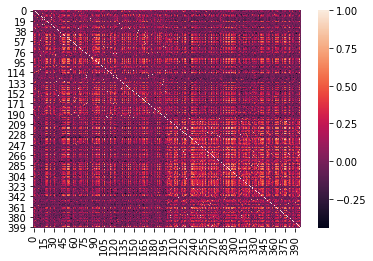

In [110]:
sns.heatmap(distance_matrix)

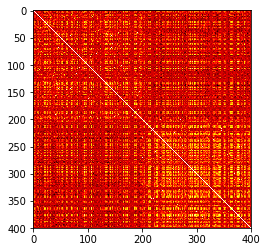

In [111]:
plt.imshow(distance_matrix, cmap='hot', interpolation='nearest')
plt.show()